# Tianyi's Dataset: Crime Rates

In [7]:
import pandas as pd
import geopandas as gpd

In [8]:
police_arrests = pd.read_csv("police-arrests.csv")
police_arrests.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [9]:
neighborhood_arrests = police_arrests["INCIDENTNEIGHBORHOOD"]
num_neighborhood_arrests = neighborhood_arrests.value_counts().to_frame()
num_neighborhood_arrests = num_neighborhood_arrests.rename(columns = {"INCIDENTNEIGHBORHOOD": "Number of Arrests"})

In [10]:
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Outside City", "Outside County", "Outside State", "Mt. Oliver Boro"])

num_neighborhood_arrests.loc["Mount Oliver"] += num_neighborhood_arrests.loc["Mt. Oliver Neighborhood"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Mt. Oliver Neighborhood"])

num_neighborhood_arrests.loc["Troy Hill"] += num_neighborhood_arrests.loc["Troy Hill-Herrs Island"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Troy Hill-Herrs Island"])

num_neighborhood_arrests.loc["Central Northside"] += num_neighborhood_arrests.loc["Central North Side"]
num_neighborhood_arrests = num_neighborhood_arrests.drop(["Central North Side"])

num_neighborhood_arrests = num_neighborhood_arrests.sort_values(by=["Number of Arrests"])

In [11]:
least_crime = num_neighborhood_arrests.head()

<AxesSubplot:>

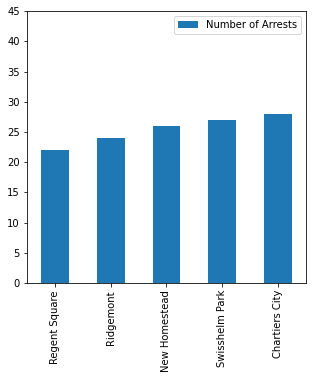

In [12]:
least_crime.plot.bar(figsize=(5,5), yticks=([i for i in range(0, 50, 5)]))

In [13]:
most_crime = num_neighborhood_arrests.iloc[::-1].head()

<AxesSubplot:>

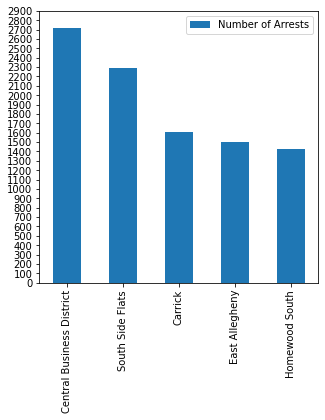

In [14]:
most_crime.plot.bar(figsize=(5,5), yticks=([i for i in range(0, 3000, 100)]))